In [29]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
results_dir = "results"
experiments = os.listdir(results_dir)

C:\Users\Jannis\AppData\Local\Temp\ipykernel_16532\1499877947.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_metrics = eval_metrics.append({"Experiment": neg_sampler_results,
C:\Users\Jannis\AppData\Local\Temp\ipykernel_16532\1499877947.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_metrics = eval_metrics.append({"Experiment": neg_sampler_results,
C:\Users\Jannis\AppData\Local\Temp\ipykernel_16532\1499877947.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_metrics = eval_metrics.append({"Experiment": neg_sampler_results,
C:\Users\Jannis\AppData\Local\Temp\ipykernel_16532\1499877947.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

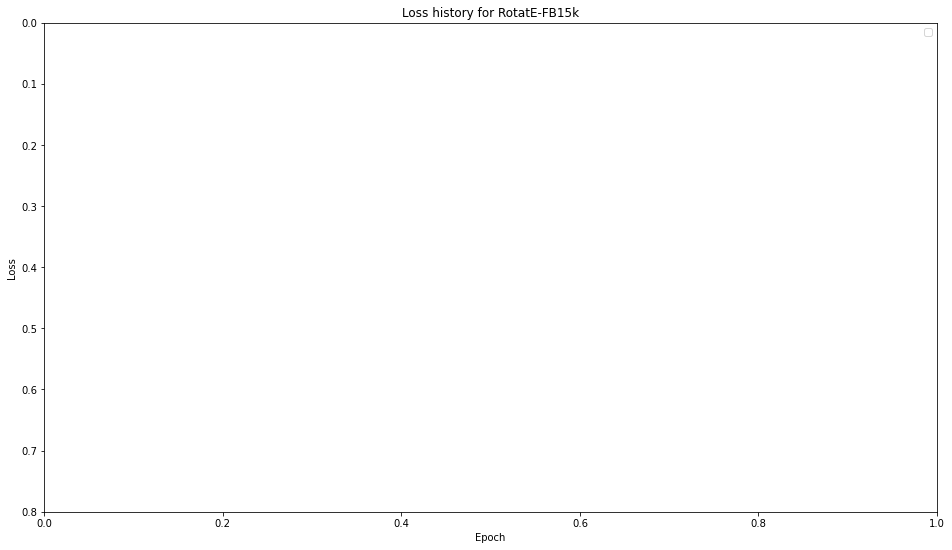

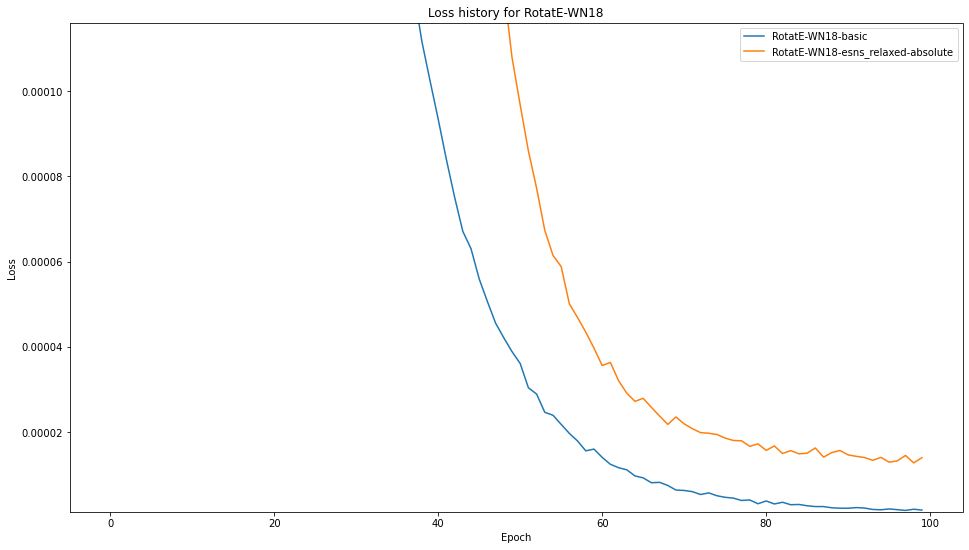

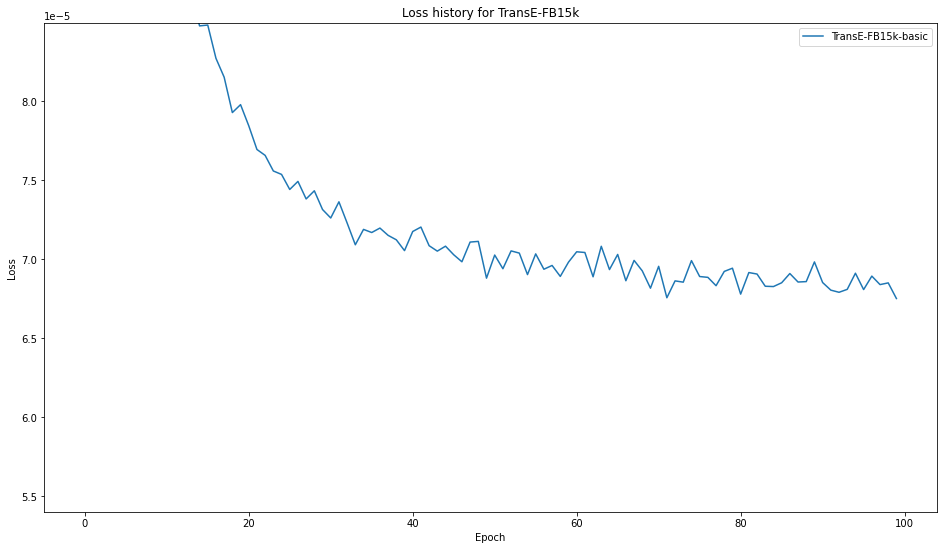

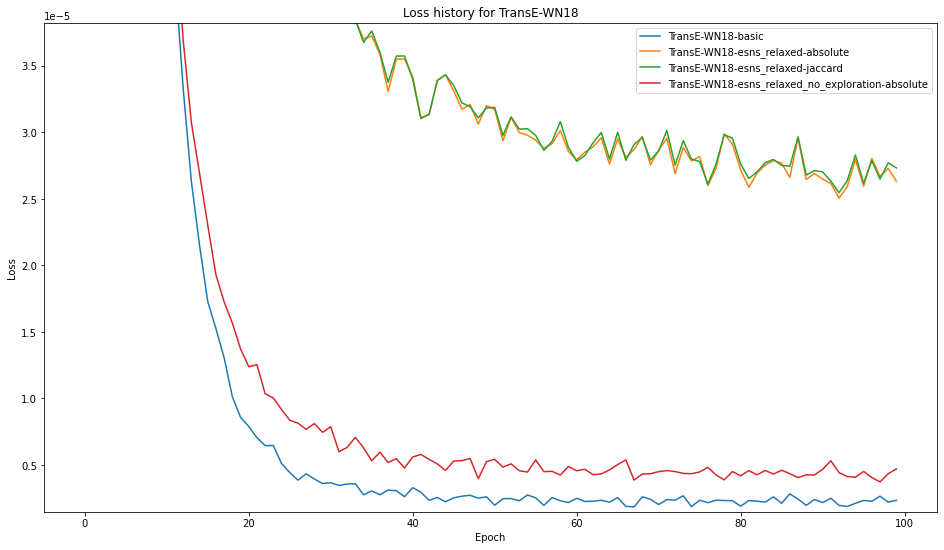

In [79]:
eval_metrics = pd.DataFrame(columns=["Experiment", "MRR", "Hits@10"])

for exp in experiments:
    plt.figure(figsize=(16,9))
    max_loss = 0
    min_loss = 1
    for neg_sampler_results in os.listdir(results_dir + "/" + exp):#
        results = json.load(open(results_dir + "/" + exp + "/" + neg_sampler_results + "/results.json"))
        if max(results["losses"][50:]) > max_loss:
            max_loss =  max(results["losses"][50:])
        if min(results["losses"][50:]) < min_loss:
            min_loss =  min(results["losses"][50:])
        plt.plot(results["losses"])

        eval_metrics = eval_metrics.append({"Experiment": neg_sampler_results, 
            "MRR":results["metrics"]["both"]["realistic"]["inverse_harmonic_mean_rank"], 
            "Hits@10": results["metrics"]["both"]["realistic"]["hits_at_10"]},
            ignore_index=True)

    plt.ylim(0.8*min_loss, 1.2*max_loss)
    plt.title("Loss history for {}".format(exp))
    plt.legend(os.listdir(results_dir + "/" + exp))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.savefig(results_dir + "/loss_" + exp + ".png")

eval_metrics.to_csv(results_dir + "/eval_metrics_esns.csv")
